# IMPORT DES LIBRAIRIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# OPTIONS PANDAS 

In [2]:
pd.options.display.float_format = '{:.0f}'.format

# OUVERTURE DE NOTRE DATASET

In [3]:
df = pd.read_csv('../DATA/OUT/new_dataset_hors_outliers_surfaces_and_piece.csv')
df.head()

,IDVentes,Prix,Date,SurfaceTerrain,SurfaceBati,SurfaceCarrez,NombreLots,NombrePiecesPrincipales,CodePostal,TypeLocalName,slice,quarter,Year,Month,AvecTerrain,SurfaceBatiCat,ID,PrixTerrainM2,PrixBatiM2,PrixCarrezM2
0,174617,103950,2021-01-06,0,19,19,1,1,33600,Appartement,"[100000.0, 150000.0)",1,2021,1,False,"(0.999, 35.0]",1,0,5471,5468
1,174618,214380,2021-01-05,0,38,39,2,1,33000,Appartement,"[200000.0, 250000.0)",1,2021,1,False,"(35.0, 47.0]",2,0,5642,5558
2,174619,177000,2021-01-08,0,63,0,3,1,33320,Appartement,"[150000.0, 200000.0)",1,2021,1,False,"(60.0, 70.0]",3,0,2810,0
3,174620,153000,2021-01-08,0,30,0,2,1,33800,Appartement,"[150000.0, 200000.0)",1,2021,1,False,"(0.999, 35.0]",4,0,5100,0
4,174621,223170,2021-01-08,0,61,0,3,1,33127,Appartement,"[200000.0, 250000.0)",1,2021,1,False,"(60.0, 70.0]",5,0,3659,0


# PREMIERES ANALYSES
## ANALYSES DES TYPES DE DONNEES

In [4]:
df.dtypes

IDVentes                     int64
Prix                       float64
Date                        object
SurfaceTerrain               int64
SurfaceBati                  int64
SurfaceCarrez              float64
NombreLots                   int64
NombrePiecesPrincipales      int64
CodePostal                   int64
TypeLocalName               object
slice                       object
quarter                      int64
Year                         int64
Month                        int64
AvecTerrain                   bool
SurfaceBatiCat              object
ID                           int64
PrixTerrainM2              float64
PrixBatiM2                 float64
PrixCarrezM2               float64
dtype: object

# NOMBRE D'INDIVIDU DE NOTRE DATASET

In [34]:
df_shape = df.shape 
print(f'Notre Dataset comprend {df_shape[0]} Individus et {df_shape[1]} Features')

Notre Dataset comprend 147887 Individus et 44 Features


# ANALYSE

## ANALYSE DESCRIPTIVES DES FEATURES QUANTITATIVES

In [35]:
df.describe()

,NoDisp,ValeurFonciere,NoVoie,CP,CodeDepartement,CodeCommune,PrefixeSection,NoPlan,SurfaceCarrez1erLot,SurfaceCarrez2emeLot,...,NombrePiecesPrincipales,SurfaceTerrain,quarter,Year,Month,SurfaceCarrez,ID,PrixTerrainM2,PrixBatiM2,PrixCarrezM2
count,147887,147515,147887,147887,147887,147887,147887,147887,147887,147887,...,147887,147887,147887,147887,147887,147887,147887,147515,147509,147515
mean,1,273146,398,33409,33,233,1,398,11,1,...,4,573,3,2020,7,12,88515,420,3350,811
std,0,179106,1656,255,0,171,21,528,32,9,...,1,2504,1,1,3,33,50998,558,1610,1671
min,1,1,0,33000,33,1,0,1,0,0,...,0,0,1,2018,1,0,1,0,0,0
25%,1,155000,8,33200,33,63,0,92,0,0,...,3,0,2,2019,4,0,43108,0,2172,0
50%,1,232500,22,33380,33,213,0,217,0,0,...,4,282,3,2021,7,0,89691,222,3214,0
75%,1,345700,64,33610,33,357,0,484,0,0,...,4,679,4,2022,10,0,132572,621,4257,0
max,43,3080000,9999,33990,33,555,495,6250,6202,310,...,7,382680,4,2023,12,6202,175017,2804,8997,7781


In [56]:
# Assurez-vous que ValeurFonciere est converti en type numérique et nettoyez les données si nécessaire
df['ValeurFonciere'] = pd.to_numeric(df['ValeurFonciere'], errors='coerce')

# Calculez le maximum en excluant les NaN
max_valeur_fonciere = df['ValeurFonciere'].max()

# Définissez les tranches de valeur foncière, en utilisant le maximum calculé
bins = [50000, 100000, 150000, 200000, 250000, 300000, 400000, 500000, 600000, 750000, 1000000, 1500000, 2000000, 3000000, 4000000, 5000000, 6000000, max_valeur_fonciere]

# Utilisez pd.cut pour créer une nouvelle colonne 'Tranche'
df['Tranche'] = pd.cut(df['ValeurFonciere'], bins=bins, right=False)

ValueError: bins must increase monotonically.

### AFFICHAGE DU NOMBRE DE BIENS PAR FOURCHETTE DE PRIX DE VENTE

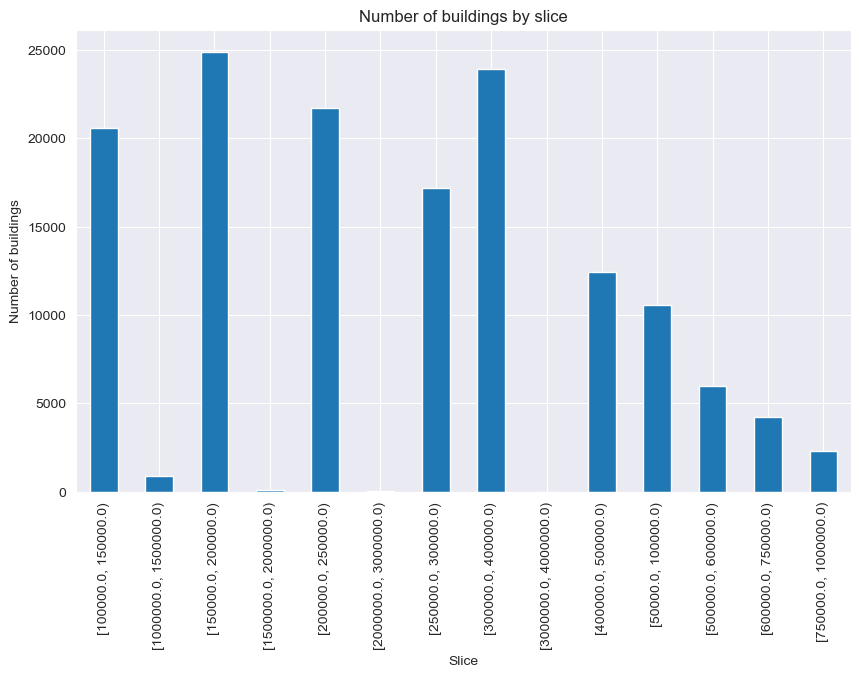

In [37]:
# Compter les biens par tranche
tranche_count = df['slice'].value_counts().sort_index()

# Créer le graphique
plt.figure(figsize=(10, 6))
tranche_count.plot(kind='bar')
plt.title('Number of buildings by slice')
plt.xlabel('Slice')
plt.ylabel('Number of buildings')
plt.show()

### CONCLUSIONS 
La majeure partie des biens immobilliers se concentre entre 100 000 ET 500 000 Euros, ce qui est une tranche convenable pour notre ML

# CREATION D'UNE CARTE CHAUDE POUR VOIR LES CORRELATION ENTRE LES FEATURES QUANTITATIVE ET NOTRE PRIX DE VENTE

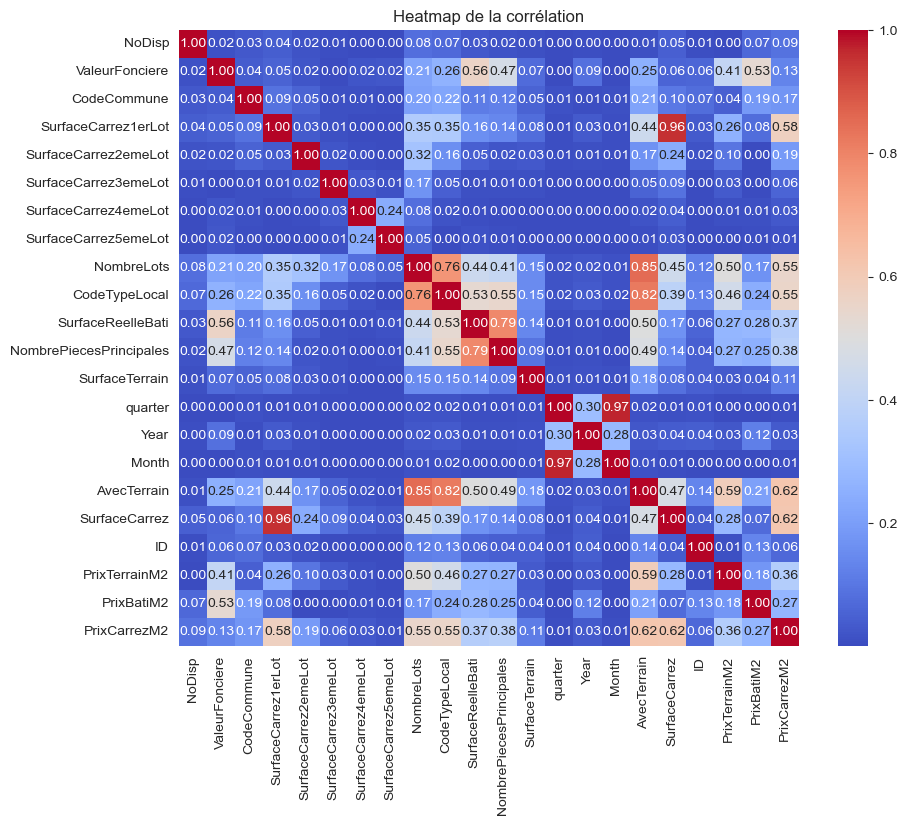

In [57]:
# Supprimer les colonnes non numériques
cols_to_drop = ['DateMutation', 'NoPlan', 'CP', 'NoVoie', 'PremierLot', 'DeuxiemeLot', 'TroisiemeLot', 'QuatriemeLot', 'CinquiemeLot', 'BTQ', 'TypeVoie', 'CodeVoie', 'Voie', 'Commune', 'CodeDepartement', 'PrefixeSection', 'Section', 'NatureCulture', 'NatureCultureSpeciale']
df_num = df.drop(columns=cols_to_drop)

# Convertir toutes les colonnes en numérique, ignorer les erreurs ('coerce' crée NaN pour les non convertibles)
df_num = df_num.apply(pd.to_numeric, errors='coerce')

# Supprimer les colonnes avec toutes les valeurs NaN résultant de la conversion
df_num = df_num.dropna(axis=1, how='all')

# Calculer la matrice de corrélation sur les colonnes restantes
corr_df_num = abs(df_num.corr())

# Utiliser Seaborn pour créer une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df_num, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap de la corrélation')
plt.show()

## ANALYSE DES DATES DE VENTES

### FEATURES ENGINEERING POUR CREER DE NOUVELLES FEATURES TEMPORELLES

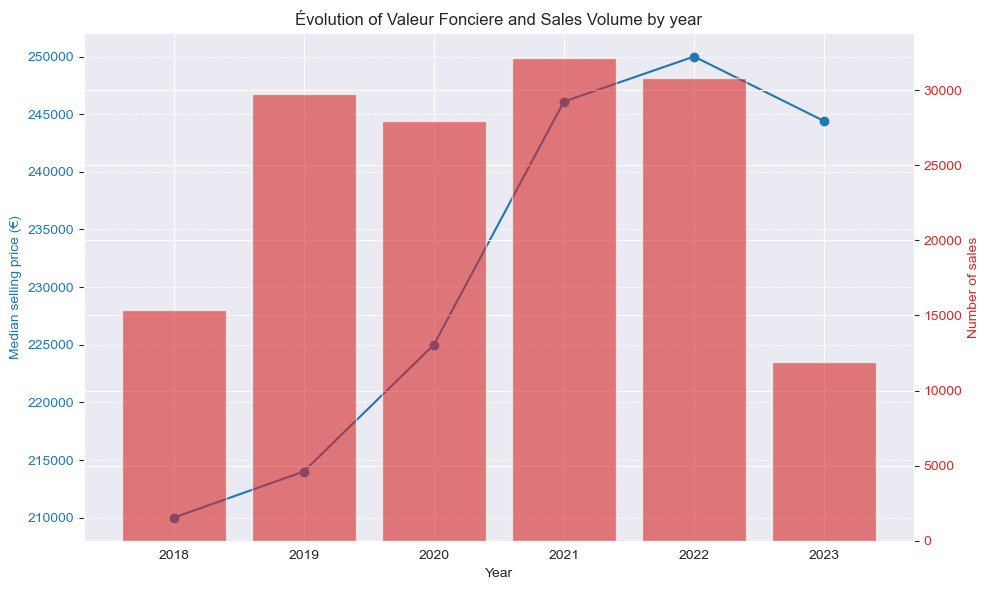

In [41]:
# DataFrame filtré sur les années pleines
# df_year = df.loc[(df['Year'] >= 2019) & (df['Year'] <= 2022)]

# Calculer le prix médian par année
average_price_per_year = df.groupby('Year')['ValeurFonciere'].median()

# Calculer la volumétrie des ventes par année
sales_volume_per_year = df.groupby('Year').size()

# Créer une figure et un premier axe pour le line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Median selling price (€)', color=color)
ax1.plot(average_price_per_year.index, average_price_per_year, marker='o', color=color)  # corrected line
ax1.tick_params(axis='y', labelcolor=color)
ax1.ticklabel_format(style='plain', axis='y')

# Créer un second axe pour le bar chart
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Number of sales', color=color)
ax2.bar(sales_volume_per_year.index, sales_volume_per_year, color=color, alpha=0.6, label='Number of Sales')  # corrected line
ax2.tick_params(axis='y', labelcolor=color)

# Ajouter des titres et du grid
plt.title('Évolution of Valeur Fonciere and Sales Volume by year')
ax1.grid(axis='y', linestyle='--', linewidth=0.7)

# Montrer le graphique
fig.tight_layout()
plt.show()

## CONCLUSIONS :

On observe un prix median en net augmentation entre 2020 et 2021, il est donc important de garder cette feature dans notre model.

### ANALYS BY QUARTER

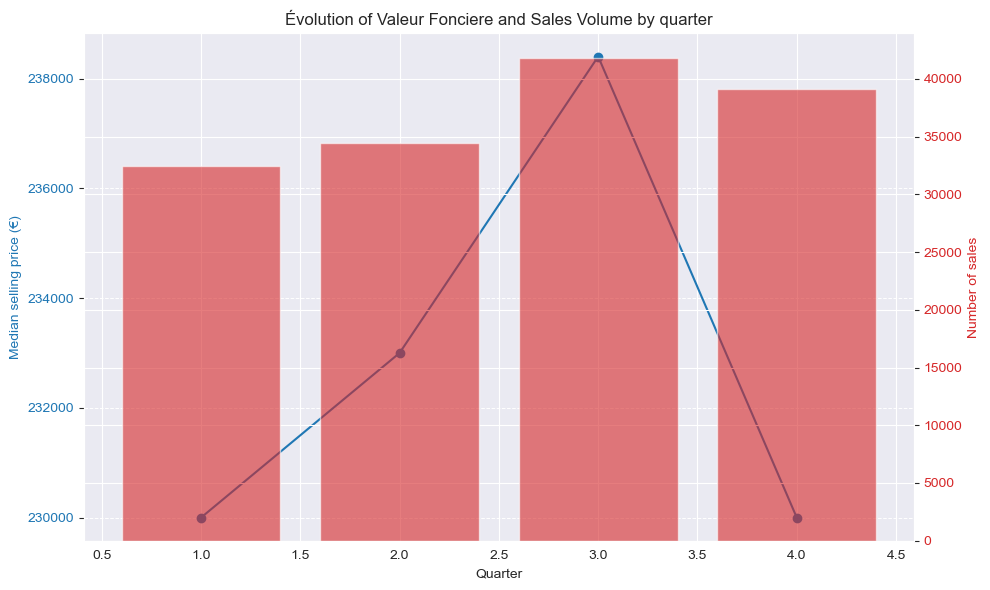

In [42]:
# Calculer le prix médian par trimestre
average_price_per_quarter = df.groupby('quarter')['ValeurFonciere'].median()

# Calculer la volumétrie des ventes par trimestre
sales_volume_per_quarter = df.groupby('quarter').size()

# Créer une figure et un premier axe pour le line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Median selling price (€)', color=color)
ax1.plot(average_price_per_quarter.index, average_price_per_quarter, marker='o', color=color)  
ax1.tick_params(axis='y', labelcolor=color)
ax1.ticklabel_format(style='plain', axis='y')

# Créer un second axe pour le bar chart
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Number of sales', color=color)
ax2.bar(sales_volume_per_quarter.index, sales_volume_per_quarter, color=color, alpha=0.6, label='Number of Sales')  # corrected line
ax2.tick_params(axis='y', labelcolor=color)

# Ajouter des titres et du grid
plt.title('Évolution of Valeur Fonciere and Sales Volume by quarter')
ax1.grid(axis='y', linestyle='--', linewidth=0.7)

# Montrer le graphique
fig.tight_layout()
plt.show()

## CONCLUSIONS :

On observe une légère augmentation du prix median suivant le trimestre, ce prix influe de 17500 euros, cette features n'est peut-être pas si importante

### ANALYSE PAR MOIS

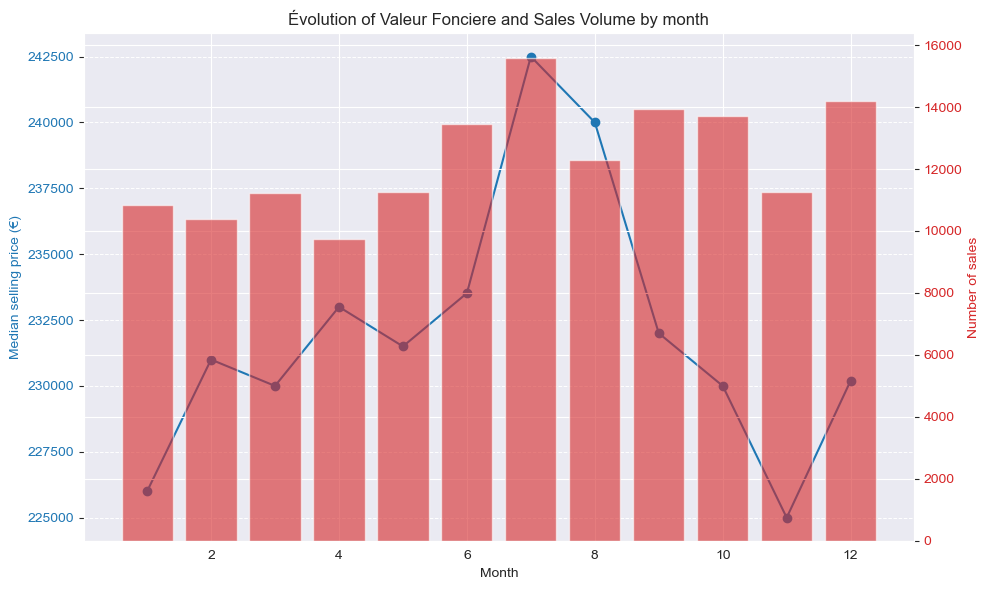

In [43]:
# Calculer le prix médian par mois
average_price_per_month = df.groupby('Month')['ValeurFonciere'].median()

# Calculer la volumétrie des ventes par mois
sales_volume_per_month = df.groupby('Month').size()

# Créer une figure et un premier axe pour le line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Median selling price (€)', color=color)
ax1.plot(average_price_per_month.index, average_price_per_month, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.ticklabel_format(style='plain', axis='y')

# Créer un second axe pour le bar chart
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Number of sales', color=color)
ax2.bar(sales_volume_per_month.index, sales_volume_per_month, color=color, alpha=0.6, label='Number of Sales')  # corrected line
ax2.tick_params(axis='y', labelcolor=color)

# Ajouter des titres et du grid
plt.title('Évolution of Valeur Fonciere and Sales Volume by month')
ax1.grid(axis='y', linestyle='--', linewidth=0.7)

# Montrer le graphique
fig.tight_layout()
plt.show()

## CONCLUSIONS :

On observe, 2 pics de valeurs en termes de ventes et de prix median en juillet et en aout, il faudrait vérifier nos outliers voir à quels moments ils ont été vendues, et rejouer l'analyse, sans ces outliers

## ANALYSE DES TYPE DE BIENS IMMOBILIER (Appt, Maison)

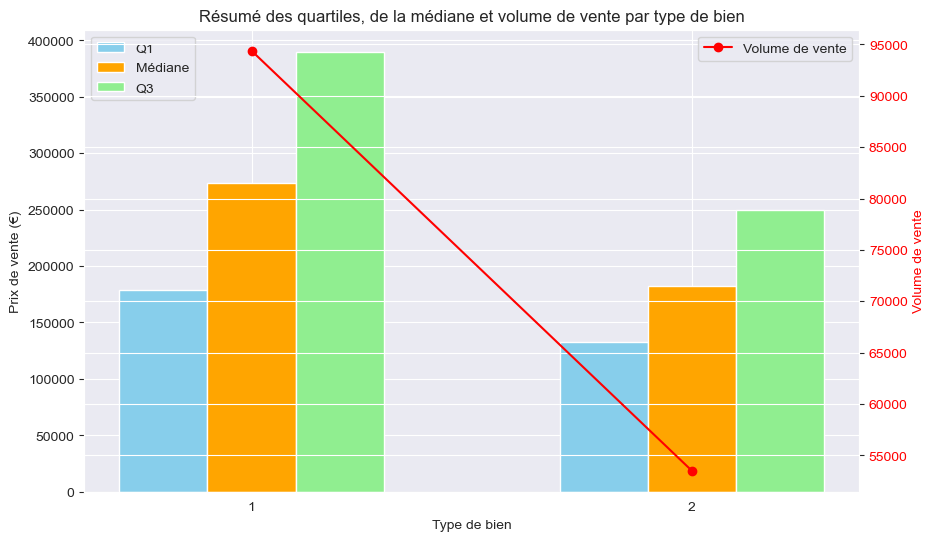

In [44]:
# Calcul des statistiques descriptives pour chaque 'CodeTypeLocal'
stats_df = df.groupby('CodeTypeLocal')['ValeurFonciere'].describe()

# Sélection des quartiles et de la médiane pour chaque 'CodeTypeLocal'
quartiles_df = stats_df.loc[:, ['25%', '50%', '75%']]
quartiles_df.columns = ['Q1', 'Médiane', 'Q3']

# Calcul de la volumétrie des ventes pour chaque 'CodeTypeLocal'
volumes_df = df['CodeTypeLocal'].value_counts().reindex(quartiles_df.index)

# Création des graphiques en barres pour chaque quartile et la médiane
fig, ax1 = plt.subplots(figsize=(10, 6))

# Position sur l'axe des x pour chaque 'CodeTypeLocal' et les groupes de barres
ind = np.arange(len(quartiles_df))  # l'emplacement x des groupes
width = 0.2  # la largeur des barres

# Barres pour Q1
ax1.bar(ind - width, quartiles_df['Q1'], width, color='skyblue', label='Q1')

# Barres pour la Médiane
ax1.bar(ind, quartiles_df['Médiane'], width, color='orange', label='Médiane')

# Barres pour Q3
ax1.bar(ind + width, quartiles_df['Q3'], width, color='lightgreen', label='Q3')

# Configuration de l'axe des x
ax1.set_xlabel('Type de bien')
ax1.set_ylabel('Prix de vente (€)')
ax1.set_title('Résumé des quartiles, de la médiane et volume de vente par type de bien')
ax1.set_xticks(ind)
ax1.set_xticklabels(quartiles_df.index)
ax1.legend(loc='upper left')

# Créer un second axe pour le volume des ventes
ax2 = ax1.twinx()
ax2.plot(ind, volumes_df, color='red', marker='o', label='Volume de vente')
ax2.set_ylabel('Volume de vente', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.show()


### CONCLUSIONS :

On Observe que le type d'individu numéro 2 est sous représenté en terme de volumétrie de vente. 
Concernant le prix médian, ce dernier est nettement inférieur également.

## ANALYSE DU PRIX SELON LSI IL Y AS UN TERRAIN OU NON (FEATURE ENGINEERING POUR CREATION DE LA FEATURE AvecTerrain)

C:\Users\jonat\AppData\Local\Temp\ipykernel_12532\2663165351.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Sans terrain', 'Avec terrain'])
C:\Users\jonat\AppData\Local\Temp\ipykernel_12532\2663165351.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volumetrie_terrain.index, y=volumetrie_terrain.values, ax=ax2, palette=['red', 'darkred'], alpha=0.6)
C:\Users\jonat\AppData\Local\Temp\ipykernel_12532\2663165351.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Sans terrain', 'Avec terrain'])


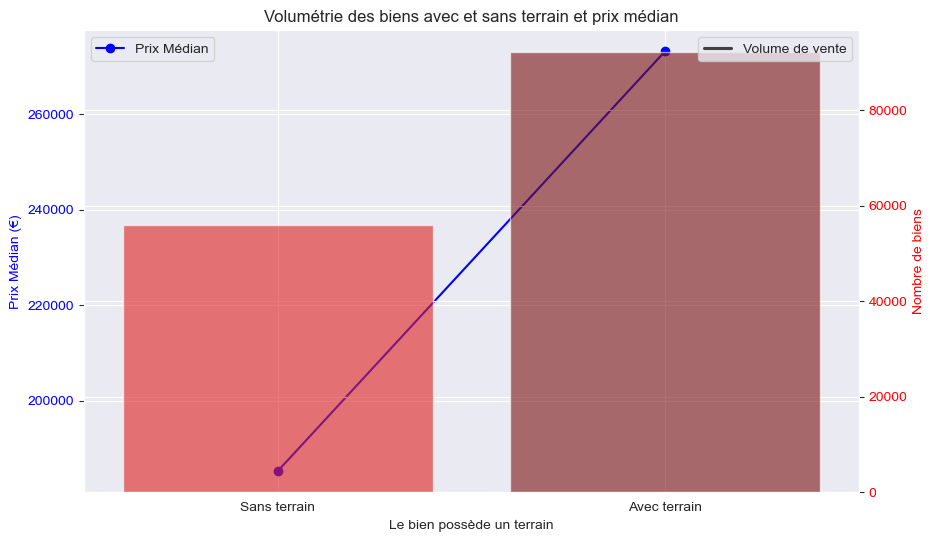

In [45]:
# Préparation des données
df['AvecTerrain'] = df['SurfaceTerrain'] > 0

# Calculer le nombre de biens avec et sans terrain
volumetrie_terrain = df.groupby('AvecTerrain').size()

# Calculer le prix médian pour les biens avec et sans terrain
prix_median_terrain = df.groupby('AvecTerrain')['ValeurFonciere'].median()

# Création du bar plot pour la volumétrie
fig, ax1 = plt.subplots(figsize=(10, 6))

# Configurer l'axe des y pour le prix médian en bleu
ax1.set_ylabel('Prix Médian (€)', color='blue')
ax1.plot(prix_median_terrain.index, prix_median_terrain.values, color='blue', marker='o', label='Prix Médian')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(['Sans terrain', 'Avec terrain'])
ax1.legend(loc='upper left')

# Créer un second axe pour la volumétrie des biens
ax2 = ax1.twinx()

# Configurer l'axe des y pour la volumétrie en rouge
ax2.set_ylabel('Nombre de biens', color='red')
sns.barplot(x=volumetrie_terrain.index, y=volumetrie_terrain.values, ax=ax2, palette=['red', 'darkred'], alpha=0.6)
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_xticklabels(['Sans terrain', 'Avec terrain'])
ax2.legend(['Volume de vente'], loc='upper right')

# Configurer le titre et les étiquettes de l'axe des x
ax1.set_title('Volumétrie des biens avec et sans terrain et prix médian')
ax1.set_xlabel('Le bien possède un terrain')

plt.show()

### CONCLUSIONS :

On observe un nombre d'individu multiplié par 2 sur le label avec terrain, ainsi que le prix median qui boost de 1,5X environ

## ANALYSE DU PRIX MEDIAN SUIVANT LA SURFACE DE TERRAIN 

C:\Users\jonat\AppData\Local\Temp\ipykernel_12532\793925114.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prix_moyen_par_surface_terrain = biens_avec_terrain.groupby('SurfaceTerrainCat')['ValeurFonciere'].median()
C:\Users\jonat\AppData\Local\Temp\ipykernel_12532\793925114.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels, rotation=45)


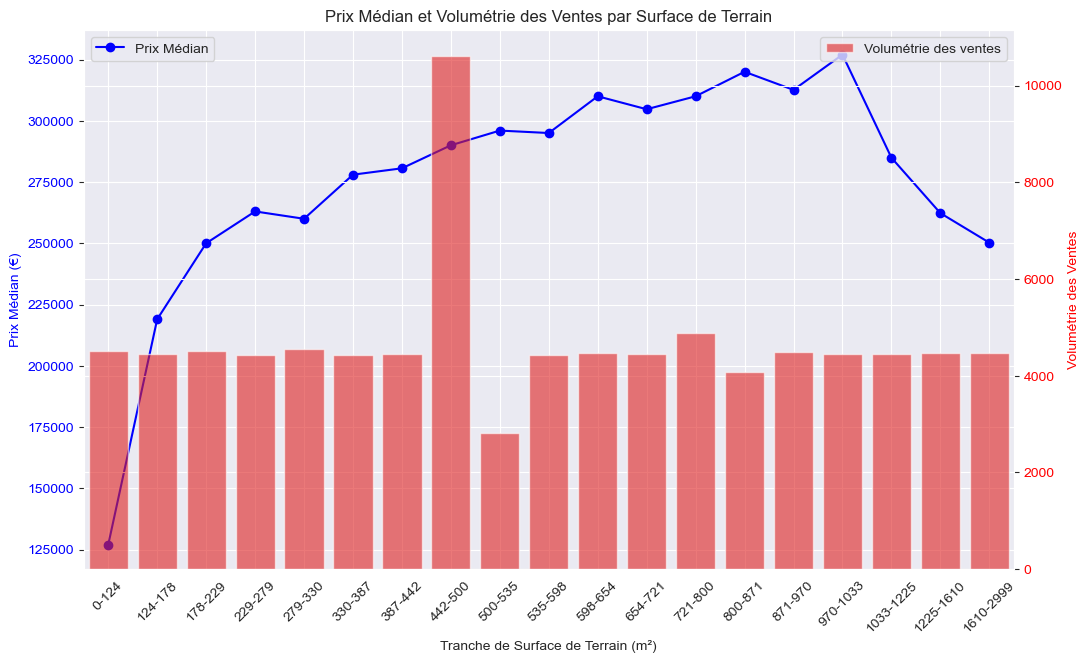

In [46]:

# Filtrez pour ne garder que les biens avec un terrain 
biens_avec_terrain = df.loc[(df['AvecTerrain'] == True) & (df['SurfaceTerrain'] < 3000)].copy()

# Découpez la surface du terrain en tranches égales selon les quantiles
# Notez que nous utilisons `duplicates='drop'` pour éviter les erreurs dans les cas où il y aurait des quantiles identiques
biens_avec_terrain['SurfaceTerrainCat'] = pd.qcut(biens_avec_terrain['SurfaceTerrain'], q=20, duplicates='drop')

# Calculez le prix médian de vente pour chaque tranche de surface de terrain
prix_moyen_par_surface_terrain = biens_avec_terrain.groupby('SurfaceTerrainCat')['ValeurFonciere'].median()

# Calculez la volumétrie des biens pour chaque tranche de surface de terrain
volumetrie_par_surface_terrain = biens_avec_terrain['SurfaceTerrainCat'].value_counts().reindex(prix_moyen_par_surface_terrain.index)

# Convertissez les intervalles en chaînes pour l'axe x
labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in prix_moyen_par_surface_terrain.index]

# Créez une figure et un premier axe
fig, ax1 = plt.subplots(figsize=(12, 7))

# Créez le line chart pour le prix médian en bleu sur l'axe ax1
ax1.plot(labels, prix_moyen_par_surface_terrain.values, color='blue', marker='o', label='Prix Médian')
ax1.set_xlabel('Tranche de Surface de Terrain (m²)')
ax1.set_ylabel('Prix Médian (€)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(labels, rotation=45)
ax1.legend(loc='upper left')

# Ajoutez un deuxième axe pour la volumétrie des ventes
ax2 = ax1.twinx()

# Créez le bar plot pour la volumetrie en rouge sur l'axe ax2
sns.barplot(x=labels, y=volumetrie_par_surface_terrain.values, ax=ax2, color='red', alpha=0.6, label='Volumétrie des ventes')
ax2.set_ylabel('Volumétrie des Ventes', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Mettez un titre au graphique
plt.title('Prix Médian et Volumétrie des Ventes par Surface de Terrain')

plt.show()

### CONCLUSIONS :

On observe un nombre d'individu par tranche de surface terrain similaire qui est dut à notre méthode QCUT, néamoins, le prix median lui semble adopter une légère courbe linéaire.

# ANALYSE DU PRIX DE VENTE PAR SURFACE BATI 

C:\Users\jonat\AppData\Local\Temp\ipykernel_12532\1170238209.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prix_moyen_par_surface_bati = df.groupby('SurfaceBatiCat')['ValeurFonciere'].median()
C:\Users\jonat\AppData\Local\Temp\ipykernel_12532\1170238209.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels, rotation=45)


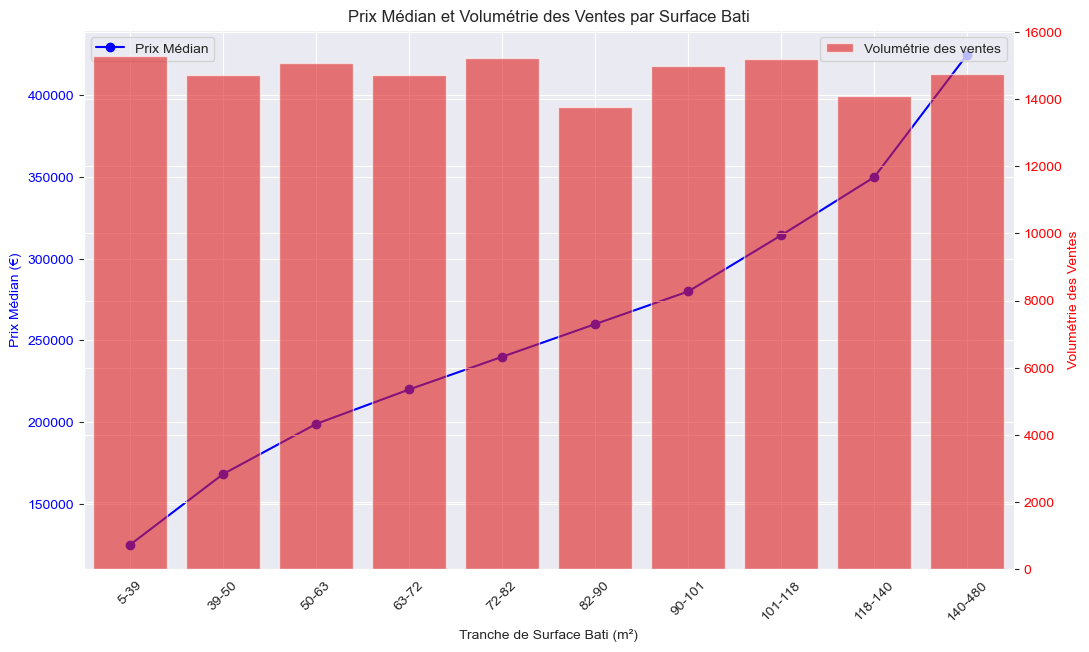

In [47]:

# Découpez la surface du terrain en tranches égales selon les quantiles
# Notez que nous utilisons `duplicates='drop'` pour éviter les erreurs dans les cas où il y aurait des quantiles identiques
df['SurfaceBatiCat'] = pd.qcut(df['SurfaceReelleBati'], q=10, duplicates='drop')

# Calculez le prix médian de vente pour chaque tranche de surface de terrain
prix_moyen_par_surface_bati = df.groupby('SurfaceBatiCat')['ValeurFonciere'].median()

# Calculez la volumétrie des biens pour chaque tranche de surface de terrain
volumetrie_par_surface_bati = df['SurfaceBatiCat'].value_counts().reindex(prix_moyen_par_surface_bati.index)

# Convertissez les intervalles en chaînes pour l'axe x
labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in prix_moyen_par_surface_bati.index]

# Créez une figure et un premier axe
fig, ax1 = plt.subplots(figsize=(12, 7))

# Créez le line chart pour le prix médian en bleu sur l'axe ax1
ax1.plot(labels, prix_moyen_par_surface_bati.values, color='blue', marker='o', label='Prix Médian')
ax1.set_xlabel('Tranche de Surface Bati (m²)')
ax1.set_ylabel('Prix Médian (€)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(labels, rotation=45)
ax1.legend(loc='upper left')

# Ajoutez un deuxième axe pour la volumétrie des ventes
ax2 = ax1.twinx()

# Créez le bar plot pour la volumetrie en rouge sur l'axe ax2
sns.barplot(x=labels, y=volumetrie_par_surface_bati.values, ax=ax2, color='red', alpha=0.6, label='Volumétrie des ventes')
ax2.set_ylabel('Volumétrie des Ventes', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Mettez un titre au graphique
plt.title('Prix Médian et Volumétrie des Ventes par Surface Bati')

plt.show()

### CONCLUSIONS :

On observe une courbe linéaire du prix médian suivant la surface Bati, cette feature est donc très importante pour notre Model.

# ANALYSE DU PRIX SELON LA SURFACE CARREZ TOTAL (FEATURE ENGINEERING POUR LA CREATION DE LA FEATURE SurfaceCarrez

C:\Users\jonat\AppData\Local\Temp\ipykernel_12532\3995590520.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biens_carrez['SurfaceCarrezCat'] = pd.qcut(biens_carrez['SurfaceCarrez'], q=50, duplicates='drop')
C:\Users\jonat\AppData\Local\Temp\ipykernel_12532\3995590520.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prix_moyen_par_surface_carrez = biens_carrez.groupby('SurfaceCarrezCat')['ValeurFonciere'].median()
C:\Users\jonat\AppData\Local\Temp\ipykernel_12532\3995590520.py:28: UserWarning: set_ticklabels() should only be used with a fixed number 

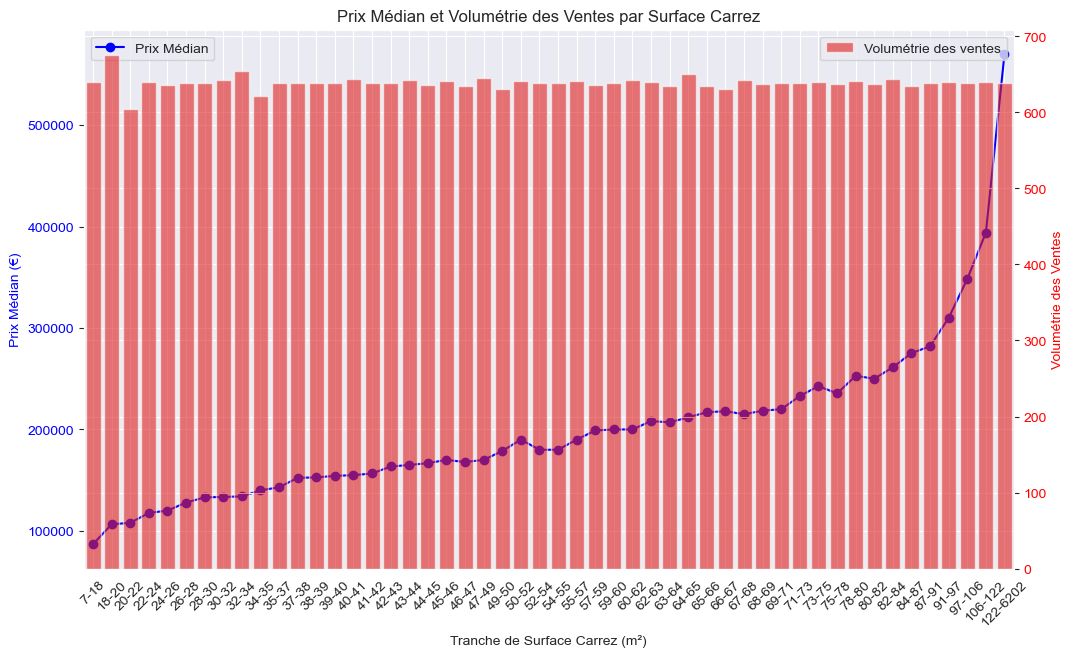

In [48]:
# Calcul de la surface carrez totale
df['SurfaceCarrez'] = df['SurfaceCarrez1erLot'] + df['SurfaceCarrez2emeLot'] + df['SurfaceCarrez3emeLot'] + df['SurfaceCarrez4emeLot'] + df['SurfaceCarrez5emeLot']

# On garde seulement pour cette analys les biens avec une surface carrez
biens_carrez = df[(df['SurfaceCarrez'] > 0)]

# Découpez la surface carrez en tranches égales selon les quantiles
# Notez que nous utilisons `duplicates='drop'` pour éviter les erreurs dans les cas où il y aurait des quantiles identiques
biens_carrez['SurfaceCarrezCat'] = pd.qcut(biens_carrez['SurfaceCarrez'], q=50, duplicates='drop')

# Calculez le prix médian de vente pour chaque tranche de surface de terrain
prix_moyen_par_surface_carrez = biens_carrez.groupby('SurfaceCarrezCat')['ValeurFonciere'].median()

# Calculez la volumétrie des biens pour chaque tranche de surface de terrain
volumetrie_par_surface_carrez = biens_carrez['SurfaceCarrezCat'].value_counts().reindex(prix_moyen_par_surface_carrez.index)

# Convertissez les intervalles en chaînes pour l'axe x
labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in prix_moyen_par_surface_carrez.index]

# Créez une figure et un premier axe
fig, ax1 = plt.subplots(figsize=(12, 7))

# Créez le line chart pour le prix médian en bleu sur l'axe ax1
ax1.plot(labels, prix_moyen_par_surface_carrez.values, color='blue', marker='o', label='Prix Médian')
ax1.set_xlabel('Tranche de Surface Carrez (m²)')
ax1.set_ylabel('Prix Médian (€)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(labels, rotation=45)
ax1.legend(loc='upper left')

# Ajoutez un deuxième axe pour la volumétrie des ventes
ax2 = ax1.twinx()

# Créez le bar plot pour la volumetrie en rouge sur l'axe ax2
sns.barplot(x=labels, y=volumetrie_par_surface_carrez.values, ax=ax2, color='red', alpha=0.6, label='Volumétrie des ventes')
ax2.set_ylabel('Volumétrie des Ventes', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Mettez un titre au graphique
plt.title('Prix Médian et Volumétrie des Ventes par Surface Carrez')

plt.show()

### CONCLUSIONS :

On observe une courbe linéaire du prix médian suivant la surface Carrez, cette feature est donc très importante pour notre Model.

# REPARTITION DU PRIX SELON LE TYPE DE TERRAIN 

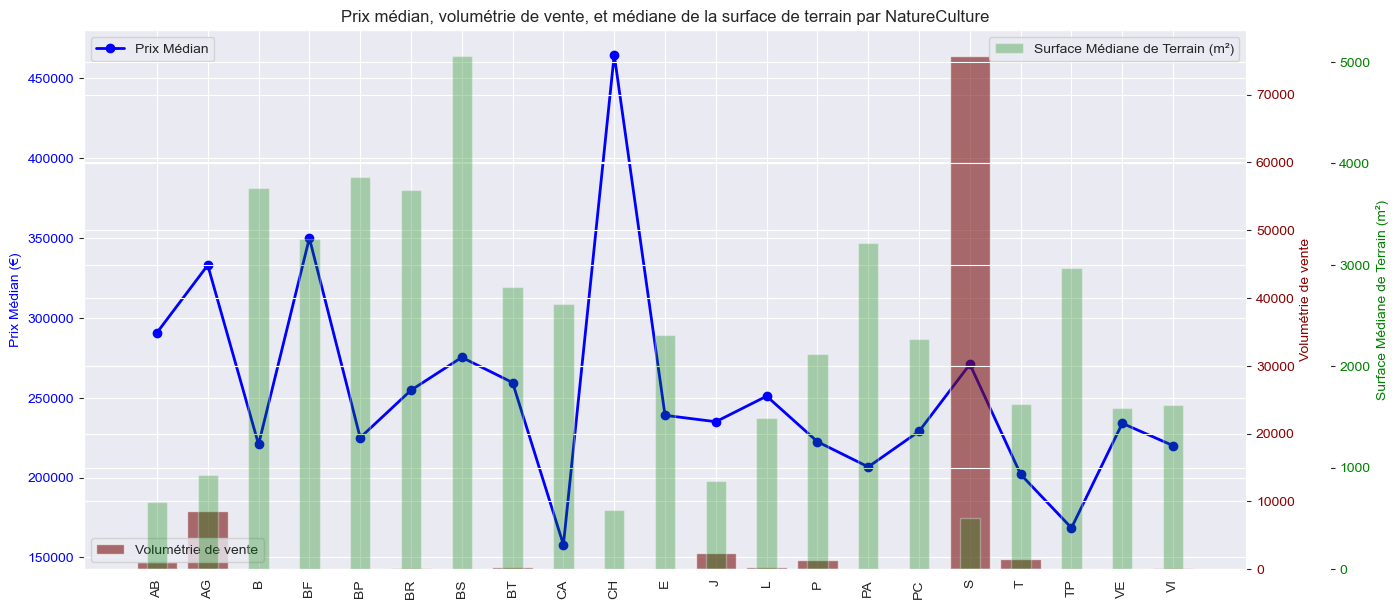

In [55]:
# Assurer que ValeurFonciere est numérique
df['ValeurFonciere'] = pd.to_numeric(df['ValeurFonciere'], errors='coerce')

# Préparation des données, en excluant les valeurs 'BR' de NatureCulture
# temp = df.loc[df['NatureCulture'] != 'BR']

# Calcul du prix médian par NatureCulture
prix_median_natureculture = df.groupby('NatureCulture')['ValeurFonciere'].median()

# Calcul de la volumétrie des ventes par NatureCulture
volumetrie_natureculture = df['NatureCulture'].value_counts()

# Calcul de la médiane de la surface de terrain pour chaque NatureCulture
median_surface_natureculture = df.groupby('NatureCulture')['SurfaceTerrain'].median().reindex(prix_median_natureculture.index)

# Création de la figure et des axes
fig, ax1 = plt.subplots(figsize=(15, 7))

# Premier axe - prix médian en ligne (bleue)
ax1.plot(prix_median_natureculture.index, prix_median_natureculture.values, color='blue', marker='o', linestyle='-', linewidth=2, label='Prix Médian')
ax1.set_ylabel('Prix Médian (€)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Prix médian, volumétrie de vente, et médiane de la surface de terrain par NatureCulture')
ax1.set_xticks(prix_median_natureculture.index)
ax1.set_xticklabels(prix_median_natureculture.index, rotation=90)

# Deuxième axe - volumétrie des ventes en barres (rouges)
ax2 = ax1.twinx()
sns.barplot(x=volumetrie_natureculture.index, y=volumetrie_natureculture.values, ax=ax2, color='darkred', alpha=0.6, label='Volumétrie de vente')
ax2.set_ylabel('Volumétrie de vente', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# Troisième axe - médiane de la surface de terrain en barres (vertes)
ax3 = ax1.twinx()
ax3.bar(median_surface_natureculture.index, median_surface_natureculture.values, alpha=0.3, color='green', width=0.4, label='Surface Médiane de Terrain (m²)')
ax3.set_ylabel('Surface Médiane de Terrain (m²)', color='green')
ax3.tick_params(axis='y', labelcolor='green')
# Ce décalage permet d'aligner correctement les barres vertes sans chevauchement.
ax3.spines['right'].set_position(('outward', 60))

# Ajout de légendes
ax1.legend(loc='upper left')
ax2.legend(loc='lower left')
ax3.legend(loc='upper right')

plt.show()

### CONCLUSIONS :

On observe une courbe linéaire du prix médian suivant le type de terrain, néanmoins, pour observer cette courbe, nous avons retiré le type de nature terrain BR.
Cette feature doit être testé sur notre model, afin de voir si elle a un réel impact étant donné que 75% de notre jeu de données concerne le Type S.


# REPARTITION DU PRIX SELON LE TYPE DE TERRAIN SPECIAL


C:\Users\jonat\AppData\Local\Temp\ipykernel_12532\1922544371.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(prix_median_natureculture_speciale.index, rotation=90)


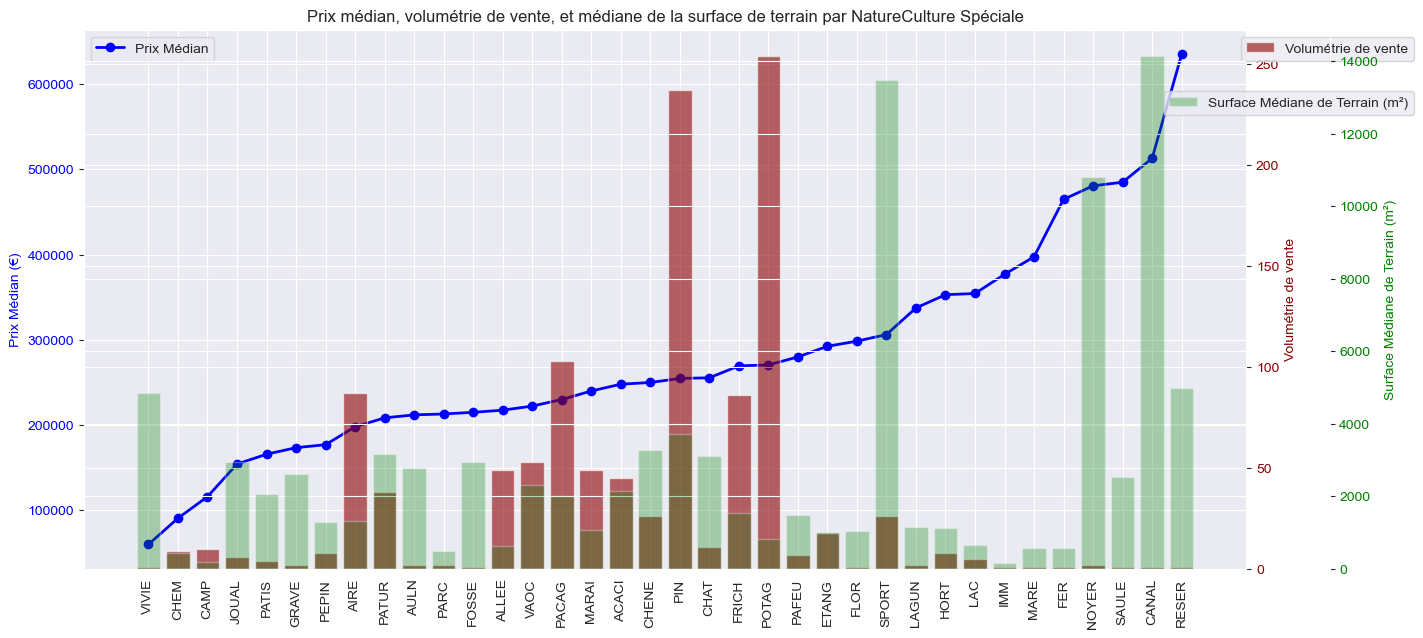

In [50]:
# Filtrez les données pour exclure les valeurs manquantes ou inutiles dans 'NatureCultureSpeciale'
temp = df.dropna(subset=['NatureCultureSpeciale'])

# Calculez le prix médian de vente pour chaque 'NatureCultureSpeciale'
prix_median_natureculture_speciale = temp.groupby('NatureCultureSpeciale')['ValeurFonciere'].median().sort_values()

# Calculez la volumétrie des ventes pour chaque 'NatureCultureSpeciale'
volumetrie_natureculture_speciale = temp['NatureCultureSpeciale'].value_counts().reindex(prix_median_natureculture_speciale.index)

# Calculez la médiane de la surface de terrain pour chaque 'NatureCultureSpeciale'
median_surface_natureculture_speciale = temp.groupby('NatureCultureSpeciale')['SurfaceTerrain'].median().reindex(prix_median_natureculture_speciale.index)

# Création de la figure et des axes
fig, ax1 = plt.subplots(figsize=(15, 7))

# Premier axe - prix médian en ligne (bleue)
ax1.plot(prix_median_natureculture_speciale.index, prix_median_natureculture_speciale.values, color='blue', marker='o', linestyle='-', linewidth=2, label='Prix Médian')
ax1.set_ylabel('Prix Médian (€)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Prix médian, volumétrie de vente, et médiane de la surface de terrain par NatureCulture Spéciale')
ax1.set_xticklabels(prix_median_natureculture_speciale.index, rotation=90)

# Deuxième axe - volumétrie des ventes en barres (rouges)
ax2 = ax1.twinx()
ax2.bar(volumetrie_natureculture_speciale.index, volumetrie_natureculture_speciale.values, color='darkred', alpha=0.6, label='Volumétrie de vente')
ax2.set_ylabel('Volumétrie de vente', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# Troisième axe - médiane de la surface de terrain en barres (vertes)
ax3 = ax1.twinx()
ax3.bar(median_surface_natureculture_speciale.index, median_surface_natureculture_speciale.values, alpha=0.3, color='green', label='Surface Médiane de Terrain (m²)')
ax3.set_ylabel('Surface Médiane de Terrain (m²)', color='green')
ax3.tick_params(axis='y', labelcolor='green')
# Décaler le troisième axe pour éviter le chevauchement des barres rouges
ax3.spines['right'].set_position(('outward', 60))

# Ajouter des légendes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
ax3.legend(loc='upper right', bbox_to_anchor=(1.15, 0.9))

plt.show()

### CONCLUSIONS

Todo


## REPARTITION DU PRIX DE VENTES PAR NOMBRE DE PIECES PRINCIPALES

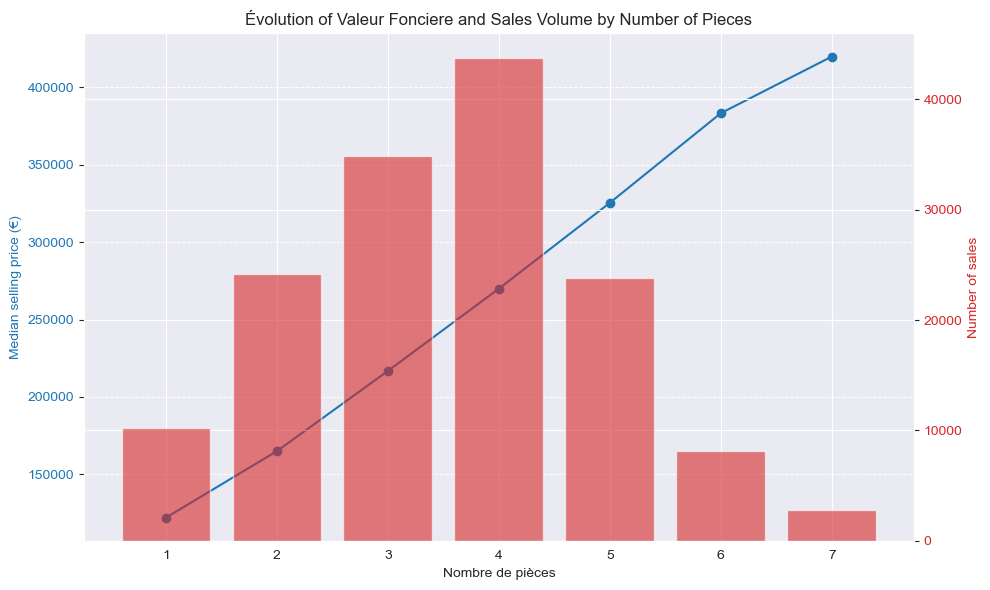

In [51]:
bien_avec_pieces = df[(df['NombrePiecesPrincipales'] > 0) & (df['NombrePiecesPrincipales'] < 13)]

# Calculer le prix médian par nombre de pieces
average_price_per_pieces = bien_avec_pieces.groupby('NombrePiecesPrincipales')['ValeurFonciere'].median()

# Calculer la volumétrie des ventes par mois
sales_volume_per_pieces = bien_avec_pieces.groupby('NombrePiecesPrincipales').size()

# Créer une figure et un premier axe pour le line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Nombre de pièces')
ax1.set_ylabel('Median selling price (€)', color=color)
ax1.plot(average_price_per_pieces.index, average_price_per_pieces, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.ticklabel_format(style='plain', axis='y')

# Créer un second axe pour le bar chart
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Number of sales', color=color)
ax2.bar(sales_volume_per_pieces.index, sales_volume_per_pieces, color=color, alpha=0.6, label='Number of Sales')  # corrected line
ax2.tick_params(axis='y', labelcolor=color)

# Ajouter des titres et du grid
plt.title('Évolution of Valeur Fonciere and Sales Volume by Number of Pieces')
ax1.grid(axis='y', linestyle='--', linewidth=0.7)

# Montrer le graphique
fig.tight_layout()
plt.show()

### CONCLUSIONS

La majorité d'individu à un nombre de pièce allant de 1 à 6, le reste pourrait s'apparenter à des outliers, néamoins le prix median semble suivre une courbe linéaire jusqu'au individus avec 12 pièces.
Cette feature est donc trés importante dans notre modèl.


# REPARTITION DU PRIX MEDIAN PAR LOCALISATION (FEATURE ENGINEERING PÖUR LA CREATION DE LA FEATURE LOCALISATION)

In [52]:
# Étape 1: Remplacer NaN par '000' dans 'PrefixeSection'
df['PrefixeSection'] = df['PrefixeSection'].fillna('000')

# Étape 2: Convertir 'PrefixeSection' en chaîne de caractères et ajouter des zéros si nécessaire
df['PrefixeSection'] = df['PrefixeSection'].astype(str).str.zfill(3)

# Étape 3: Fusionner 'CodeCommune', 'PrefixeSection' et 'Section' en un identifiant unique
df['Localisation'] = df['CodeDepartement'].astype(str) + df['CodeCommune'].astype(str) + df['PrefixeSection'] + df['Section']

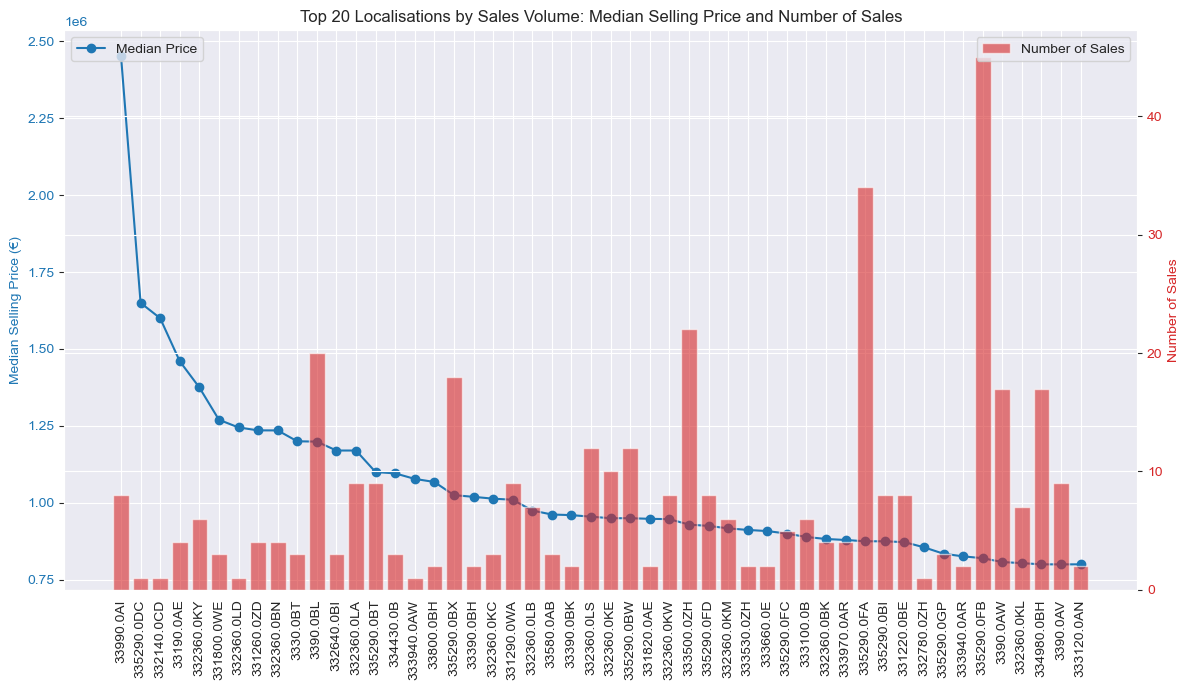

In [53]:
# Définissons N, le nombre de top localisations à afficher
N = 50

# Calculer le prix médian par localisation
average_price_per_localisation = df.groupby('Localisation')['ValeurFonciere'].median()

# Calculer la volumétrie des ventes par localisation
sales_volume_per_localisation = df.groupby('Localisation').size()

# Créez un DataFrame pour combiner les données
localisation_data = pd.DataFrame({
    'MedianPrice': average_price_per_localisation,
    'SalesVolume': sales_volume_per_localisation
})

# Tri des localisations par volume de vente et récupération du top N
top_localisations = localisation_data.sort_values(by='MedianPrice', ascending=False).head(N)

# Création de la figure et des axes pour le graphique
fig, ax1 = plt.subplots(figsize=(12, 7))

# Tracé du prix médian sur l'axe de gauche pour les top N localisations
ax1.plot(top_localisations.index, top_localisations['MedianPrice'], 'o-', color='tab:blue', label='Median Price')
ax1.set_ylabel('Median Selling Price (€)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(range(len(top_localisations.index)))
ax1.set_xticklabels(top_localisations.index, rotation=90)
ax1.legend(loc='upper left')

# Créer un deuxième axe pour la volumétrie des ventes pour les top N localisations
ax2 = ax1.twinx()
ax2.bar(range(len(top_localisations.index)), top_localisations['SalesVolume'], alpha=0.6, color='tab:red', label='Number of Sales')
ax2.set_ylabel('Number of Sales', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

# Ajouter un titre au graphique
plt.title('Top 20 Localisations by Sales Volume: Median Selling Price and Number of Sales')

# Afficher le graphique
fig.tight_layout()
plt.show()

In [ ]:
3326891.0AD

In [59]:
df['CP'].value_counts()

CP
33000    9534
33700    6240
33600    4668
33200    4104
33300    3773
         ... 
33126     192
33115     190
33890     182
33141     146
33970      91
Name: count, Length: 100, dtype: int64